# Data Analysis 



## 1. Correlation Heatmap

Creating a heat map that visualizes the correlations between stocks and indices 

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

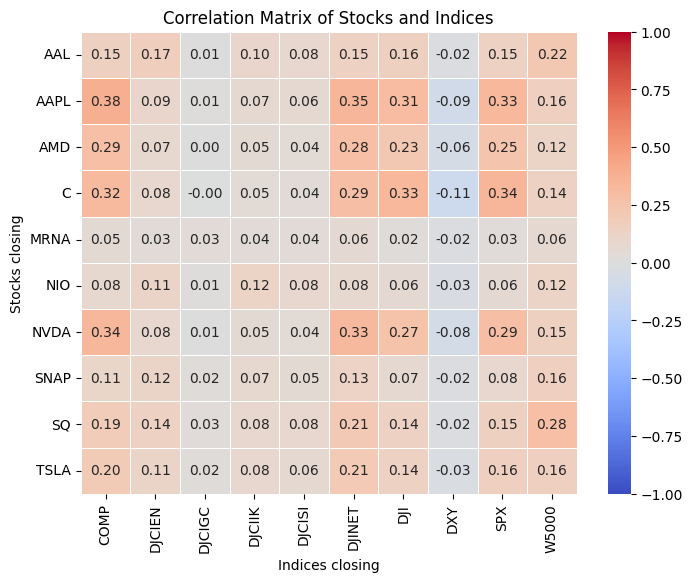

In [25]:
csv_pfad = '../../differenced.csv'

df = pd.read_csv(csv_pfad, index_col=1, parse_dates=True)

df.columns = [col.replace("close ", "") for col in df.columns]

stocks = df.iloc[:, 1:11]  
indices = df.iloc[:, 11:21]  


# Konvertierung der Ergebnisse in einen DataFrame für die Heatmap
korrelationen = pd.DataFrame(index=stocks.columns, columns=indices.columns)
for col1 in stocks.columns:
    for col2 in indices.columns:
        korrelationen.at[col1, col2] = stocks[col1].corr(indices[col2])

plt.figure(figsize=(8, 6)) 
sns.heatmap(korrelationen.astype(float), annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Stocks and Indices')
plt.xlabel('Indices closing')
plt.ylabel('Stocks closing')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Splitted heatmaps: Indices only and stocks only

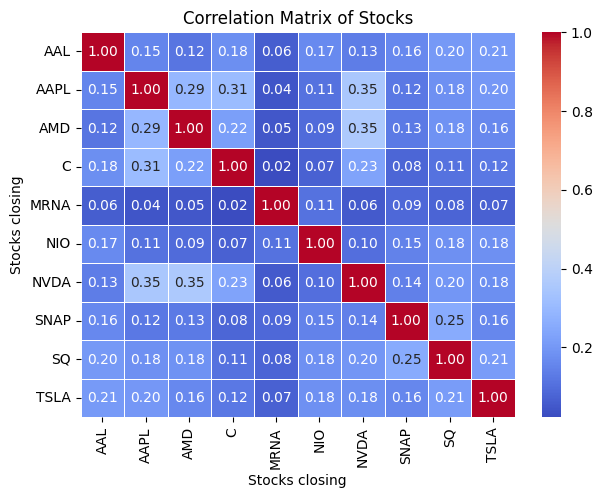

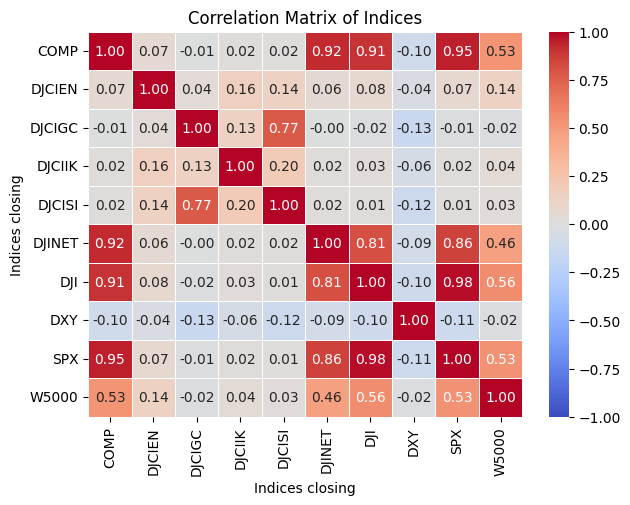

In [26]:


# Heatmap jeweils für Indices und Aktien getrennt
kurs_spalten_stocks = df.iloc[:, 1:11]
kurs_spalten_indices = df.iloc[:, 11:21]

korrelationsmatrix_stocks = kurs_spalten_stocks.corr()
korrelationsmatrix_indices = kurs_spalten_indices.corr()

plt.figure(figsize=(7, 5))  # Größe des Plots anpassen
sns.heatmap(korrelationsmatrix_stocks, annot=True, cmap='coolwarm', fmt=".2f", 
        linewidths=.5, cbar=True)

plt.title('Correlation Matrix of Stocks')
plt.xlabel('Stocks closing')
plt.ylabel('Stocks closing')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(7, 5))  # Größe des Plots anpassen
sns.heatmap(korrelationsmatrix_indices, annot=True, cmap='coolwarm', fmt=".2f", 
        linewidths=.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Indices')
plt.xlabel('Indices closing')
plt.ylabel('Indices closing')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Correlations between indices and stocks as well as correlations among stocks themselves are desirable for our model in order to improve the prediction quality. However, we would like to avoid correlations within the indices (independent variables) in order to avoid multicollinearity in our model.    
In terms of stocks, Nvidia is correlated with Apple and Advanced Micro Devices. This is in line with our expectations, as Nvidia and AMD operate in very related fields and Apple also operates in a very similar business field in the computer industry.
Unfortunately, the indices correlate strongly with each other. COMP, DJINET, DJI and SPX in particular show a strong correlation. In addition, the overall heatmap above shows that these indices correlate with the same stocks.   
In order to avoid multicollinearity DJINET, DJI and SPX are excluded from the data and only COMP is kept, as COMP correlates strongly with all three indices and also has the strongest influence on the stocks.


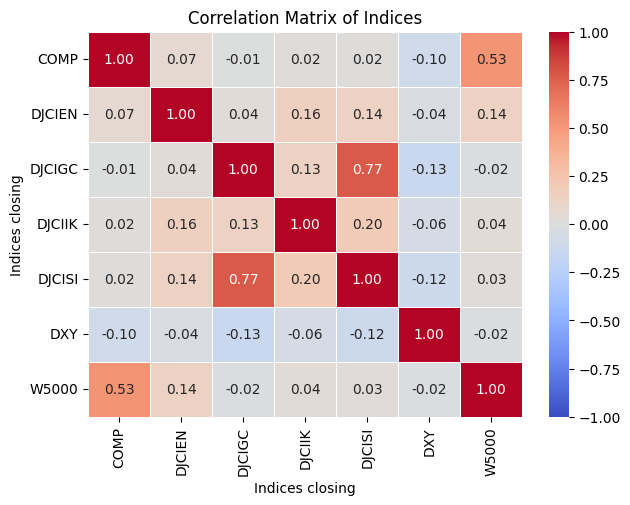

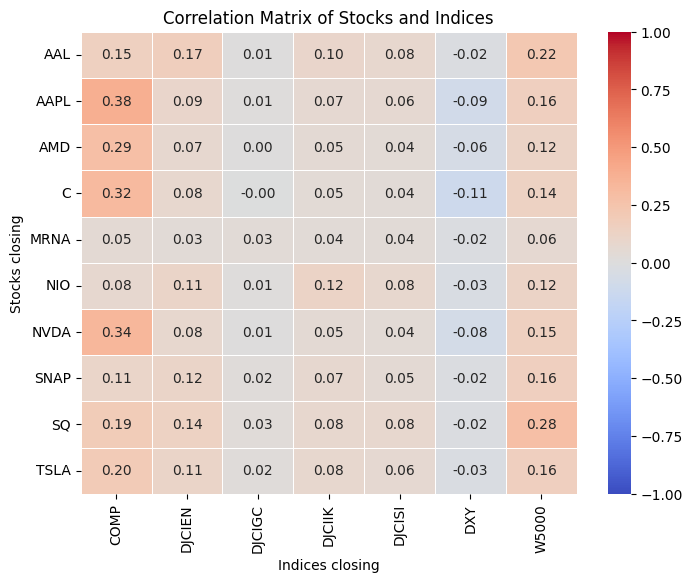

In [27]:

df_cleaned = df.drop(columns=['DJINET', 'DJI', 'SPX'])  
    # Heatmap jeweils für Indices und Aktien getrennt

kurs_indices_clean = df_cleaned.iloc[:, 11:18]

korrelationsmatrix_indices_clean = kurs_indices_clean.corr()

plt.figure(figsize=(7, 5))  # Größe des Plots anpassen
sns.heatmap(korrelationsmatrix_indices_clean, annot=True, cmap='coolwarm', fmt=".2f", 
        linewidths=.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Indices')
plt.xlabel('Indices closing')
plt.ylabel('Indices closing')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


# ab hier gut

    

stocks = df_cleaned.iloc[:, 1:11]  
indices = df_cleaned.iloc[:, 11:18] 

korrelationen_clean = pd.DataFrame(index=stocks.columns, columns=indices.columns)
for col1 in stocks.columns:
    for col2 in indices.columns:
        korrelationen_clean.at[col1, col2] = stocks[col1].corr(indices[col2])

plt.figure(figsize=(8, 6)) 
sns.heatmap(korrelationen_clean.astype(float), annot=True, cmap='coolwarm', fmt=".2f",
        linewidths=.5, cbar=True, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Stocks and Indices')
plt.xlabel('Indices closing')
plt.ylabel('Stocks closing')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## 2. Missing Values

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing

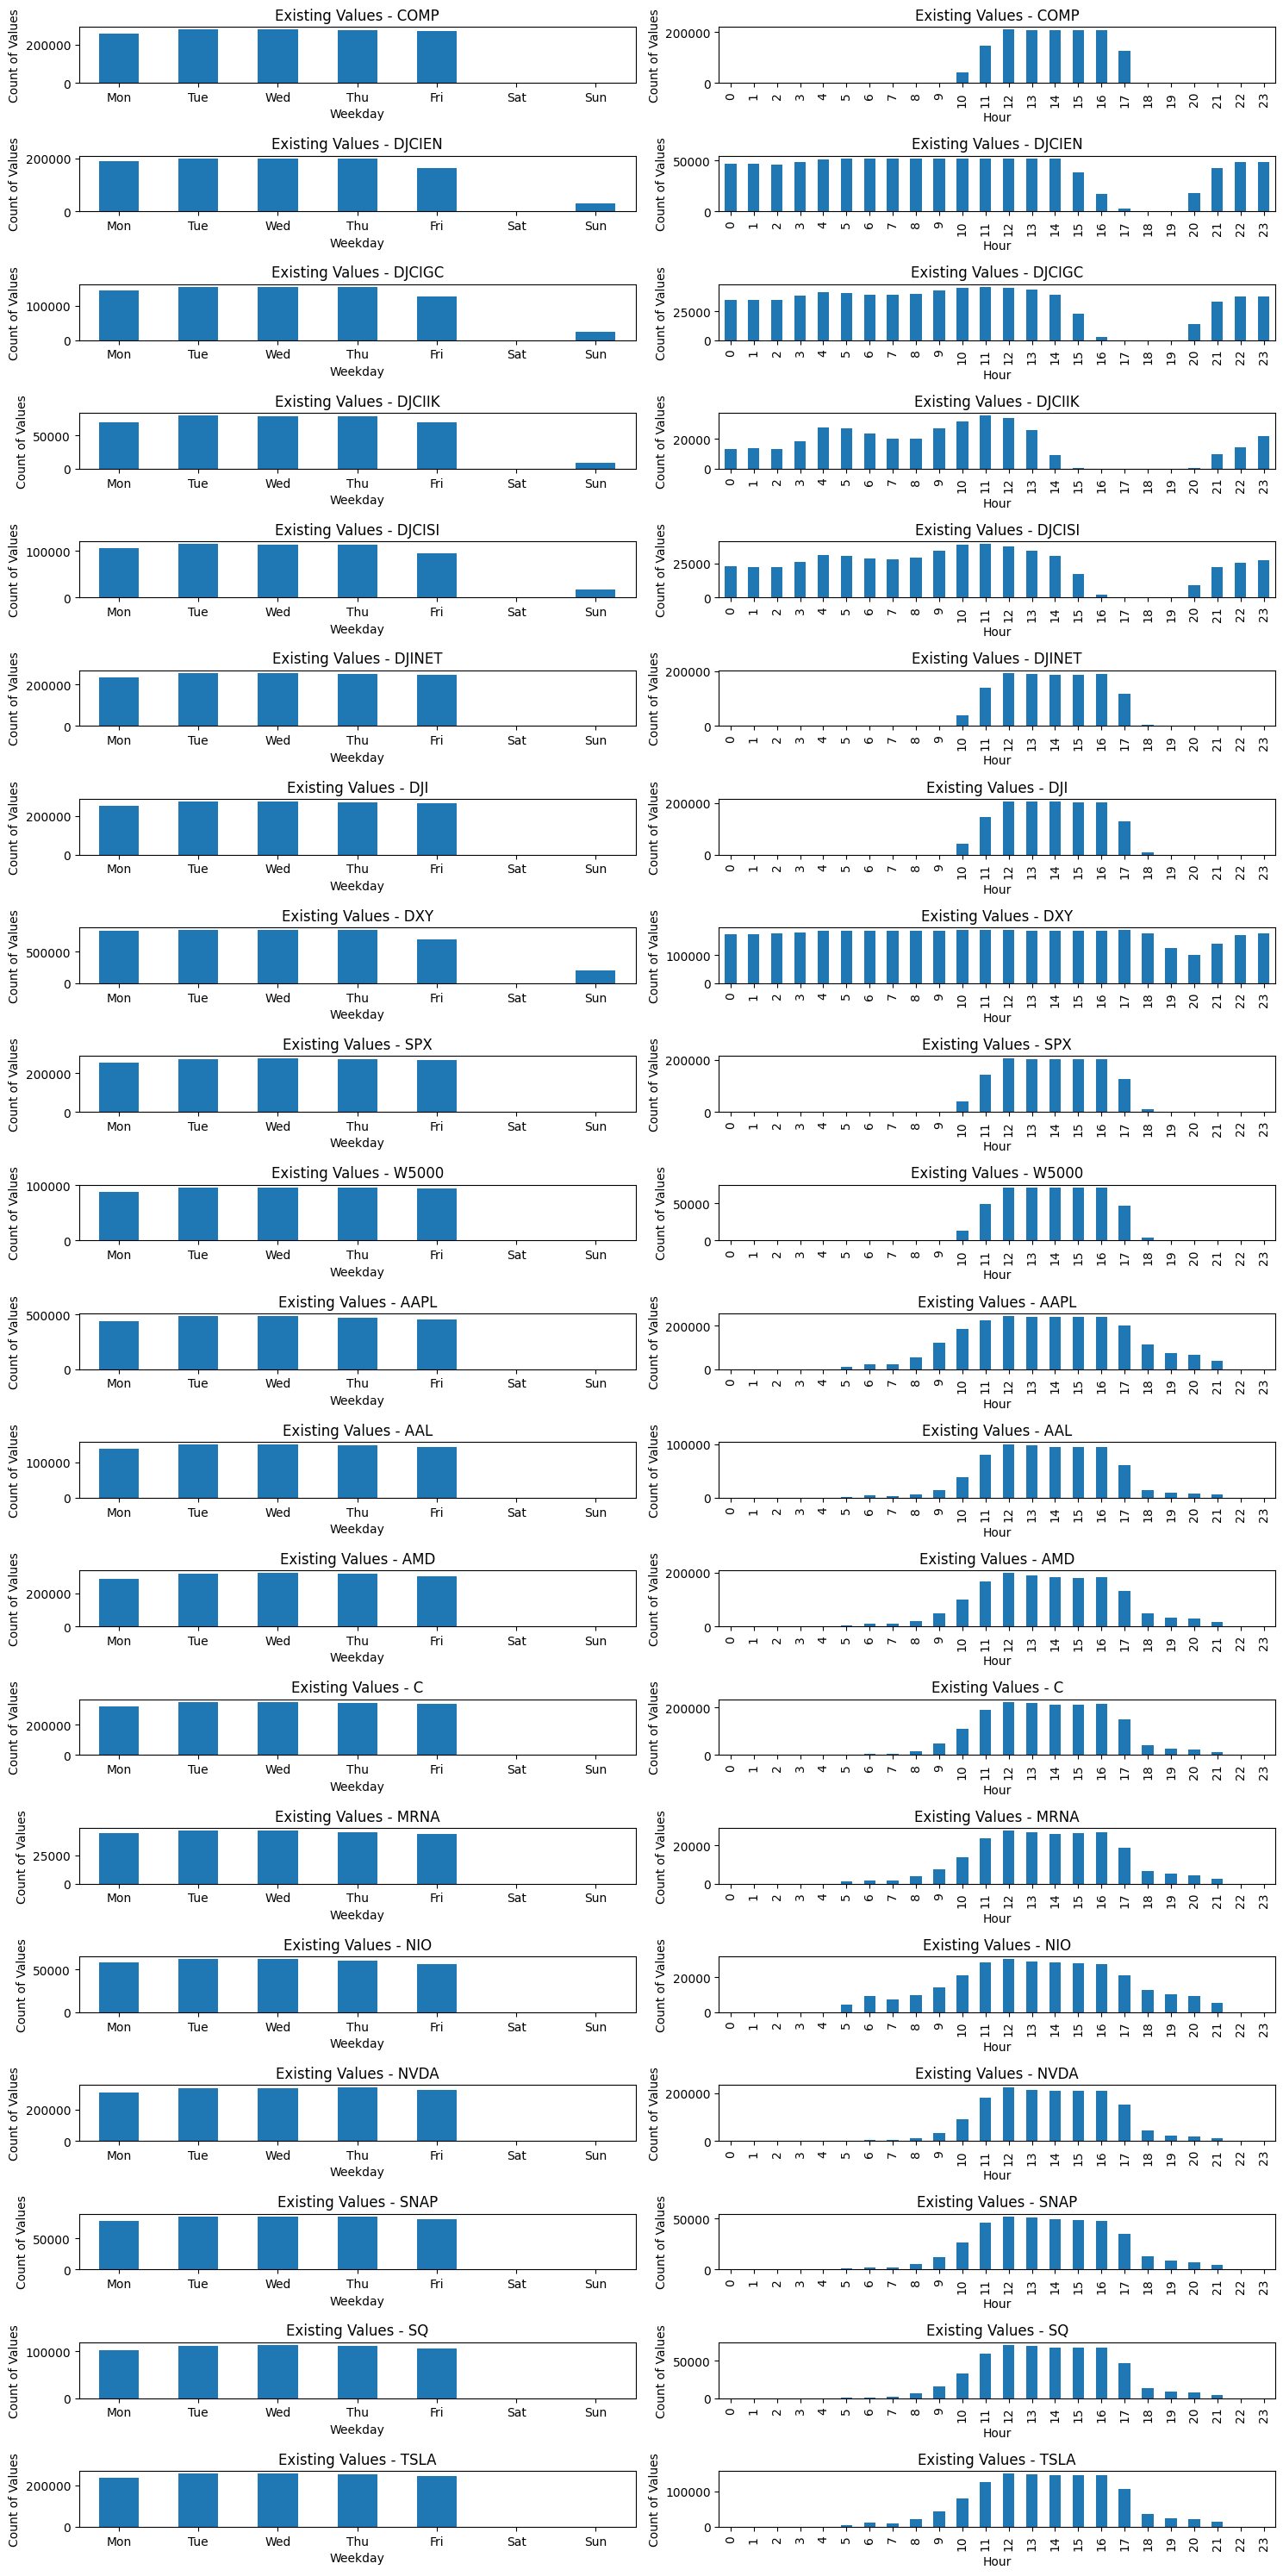

In [40]:
df = pd.read_csv('../../data/output/Multi_Symbol_full_dataset.csv')
df['timestamp'] = df['posix_time'].apply(lambda p : datetime.fromtimestamp(p))

# Assuming the relevant columns are from the second column to "close TSLA"
columns_to_plot = df.drop(['posix_time', 'timestamp', 'last of day', 'first of day'], axis=1).columns

columns_to_plot = [col for col in df.columns if col.startswith("close ")]

weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot histograms for missing values based on "Tag"
plt.figure(figsize=(15, 30))
n_col = len(columns_to_plot)
i = 1
for column in columns_to_plot:
    column_title = column.replace("close ", "")

    plt.subplot(n_col, 2, i)
    (df[column] != 0).groupby(df['timestamp'].dt.weekday).sum().plot(kind='bar', title=f'Existing Values - {column_title}')
    plt.xlabel('Weekday')
    plt.ylabel('Count of Values')
    plt.xticks(ticks=range(7), labels=weekday_labels, rotation=0)
    #plt.ylim(0, 300000)
    i += 1

    plt.subplot(n_col, 2, i)
    (df[column] != 0).groupby(df['timestamp'].dt.hour).sum().plot(kind='bar', title=f'Existing Values - {column_title}')
    plt.xlabel('Hour')
    plt.ylabel('Count of Values')
    #plt.ylim(0, 200000)
    i += 1

plt.tight_layout()
plt.show()